In [1]:
from vacation.model import VCNN
from vacation.data import GalaxyDataset
import numpy as np
import torch
rng = np.random.default_rng(1337)

In [2]:
train_ds = GalaxyDataset(
    path="/scratch/tgross/vacation_data/Galaxy10_DECals_train.h5",
    device="cuda:1",
    max_cache_size="15G",
    cache_loaded=True,
    index_collection=rng.integers(0, 16813, 6000),
)

In [3]:
valid_ds = GalaxyDataset(
    path="/scratch/tgross/vacation_data/Galaxy10_DECals_valid.h5",
    device="cuda:1",
    max_cache_size="4G",
    cache_loaded=True,
    index_collection=rng.integers(0, 4204, 1000),
)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Classes', ylabel='Counts'>)

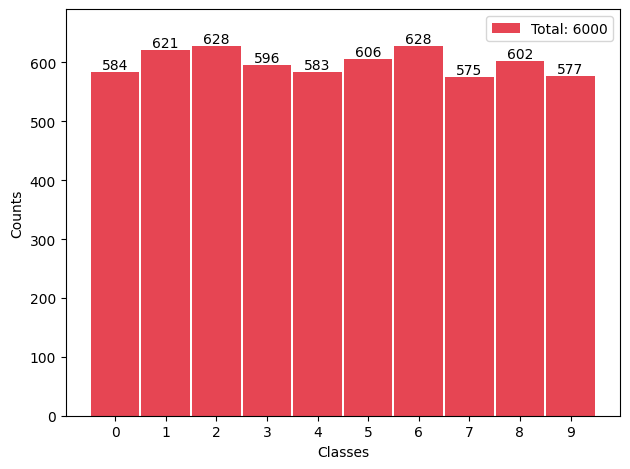

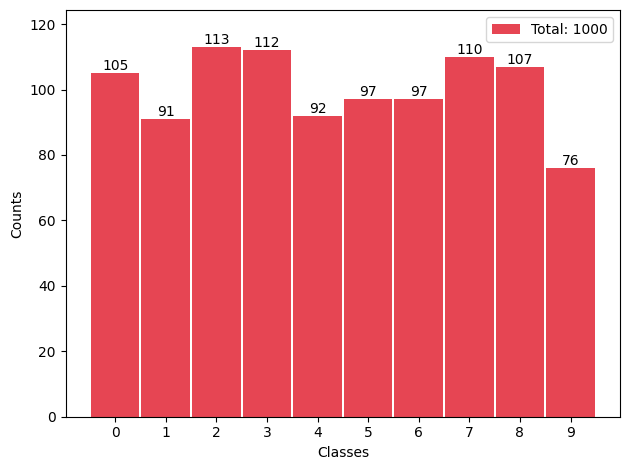

In [4]:
train_ds.plot_distribution()
valid_ds.plot_distribution()

In [5]:
model = VCNN(
    train_batch_size=64,
    valid_batch_size=64,
    out_channels=[4, 8, 10],
    dropout_rates=[0.0, 0.0, 0.0],
    lin_out_features=[300, 100],
    optimizer=torch.optim.AdamW,
    activation_func=torch.nn.PReLU,
    learning_rate=0.001,
    weight_decay=0.01,
    loss_func=torch.nn.CrossEntropyLoss,
    device="cuda:1"
)
model.init_data(train_dataset=train_ds, valid_dataset=valid_ds)

In [ ]:
model.train_epochs(n_epochs=40)

In [6]:
model.save_state(".models/model2.pt", relative_to_package=True)

In [ ]:
model1 = VCNN.load("model2.pt", optimizer=torch.optim.AdamW, activation_func=torch.nn.PReLU, loss_func=torch.nn.CrossEntropyLoss, )

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(model1._metrics["accuracy"].train_vals, label="Train")
plt.plot(model1._metrics["accuracy"].valid_vals, label="Valid")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
plt.plot(model1._loss_metric.train_vals)
plt.plot(model1._loss_metric.valid_vals)